In [31]:
pip install pandas matplotlib seaborn statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DE\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [32]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DE\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DE\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [14]:
import pandas as pd

# List of file names
file_names = ["GlobalLandTemperaturesByCity.csv", "GlobalLandTemperaturesByCountry.csv", "GlobalTemperatures.csv", "GlobalLandTemperaturesByMajorCity.csv", "GlobalLandTemperaturesByState.csv"]

# List to store DataFrames
data_frames = []

# Import CSV files and store in DataFrames
for file_name in file_names:
    data = pd.read_csv(file_name)
    data_frames.append(data)


In [15]:
# 1) Exploratory Data Analysis (EDA)
print(data.head())
print(data.info())
print(data.describe())

           dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-nul

In [21]:
print(data.head())

           dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil


In [22]:
# 2) Time Series Analysis
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
data.sort_index(inplace=True)

In [23]:
# 3) Regression based Time Series Analysis
# Calculate the rolling mean and standard deviation
data['RollingMean'] = data['AverageTemperature'].rolling(window=30).mean()
data['RollingStd'] = data['AverageTemperature'].rolling(window=30).std()

In [27]:
# 4) Make Regression Predictions with target column showing rise in future temperature
data['TemperatureShift'] = data['AverageTemperature'].shift(-30)  # Shift temperature data 30 days into the future

In [32]:
# Remove rows with missing values from X and y
data.dropna(subset=['RollingMean', 'RollingStd', 'TemperatureShift'], inplace=True)

In [33]:
# Prepare data for regression
X = data[['RollingMean', 'RollingStd']]
y = data['TemperatureShift'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Fit a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

c:\Users\DE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


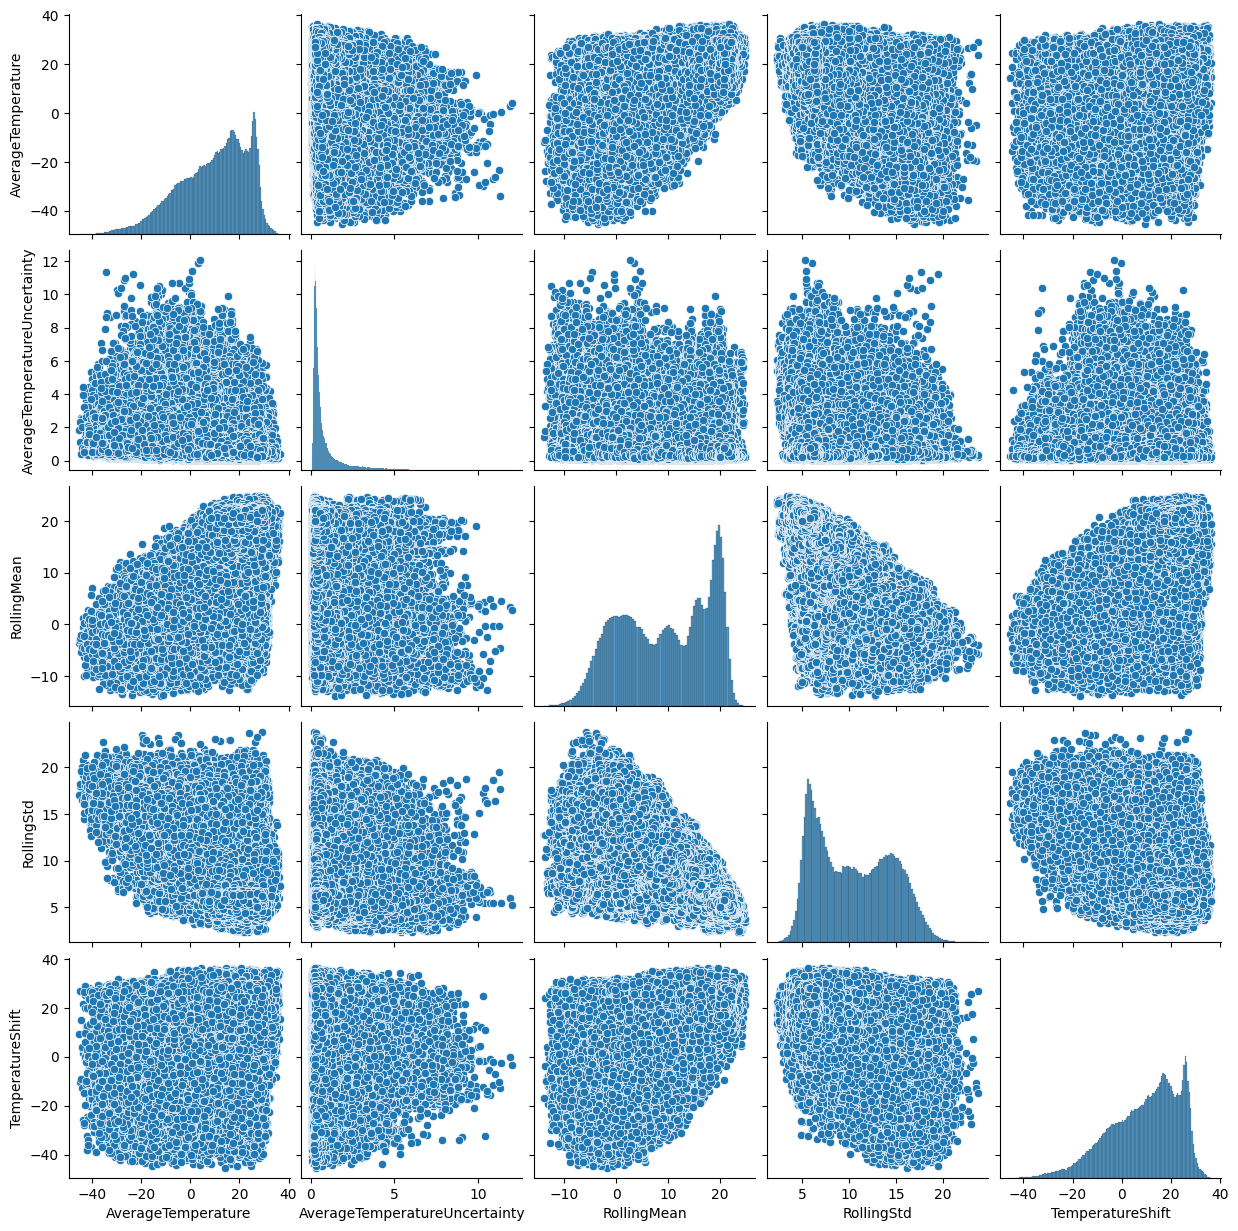

In [35]:
# 5) Plot all graphs & output
# EDA Plots
sns.pairplot(data)
plt.show()

In [50]:
missing_values = data['AverageTemperature'].isnull().sum()
print("Number of missing values:", missing_values)


Number of missing values: 25648


In [51]:
data['AverageTemperature'].fillna(method='ffill', inplace=True)


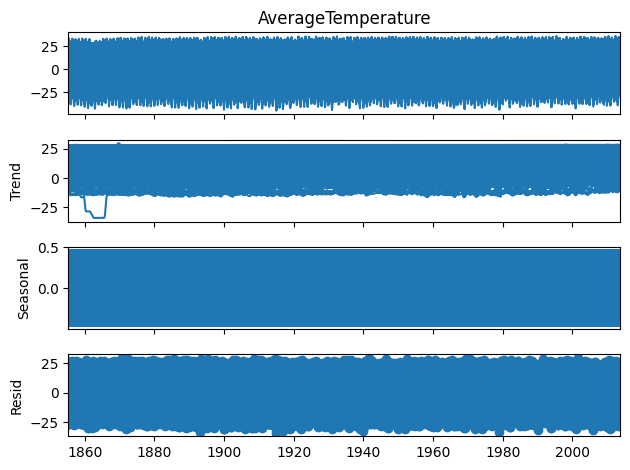

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming missing values have been handled and data has a valid time index
period = 12  # Monthly seasonal pattern
decomposition = seasonal_decompose(data['AverageTemperature'], model='additive', period=period)
decomposition.plot()
plt.show()


In [74]:
decomposition = seasonal_decompose(data['AverageTemperature'], model='additive', period=12)

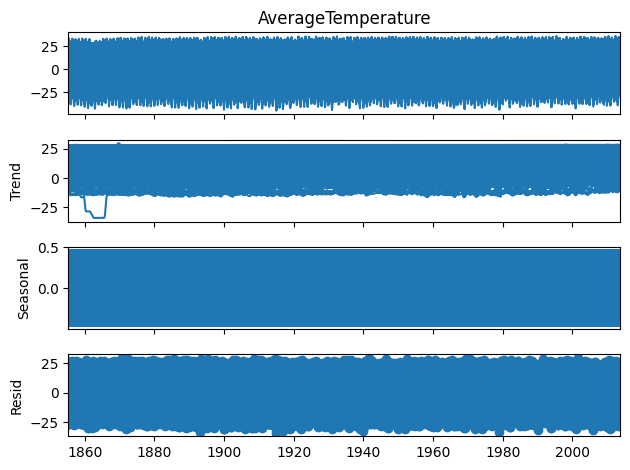

In [78]:
# Time Series Analysis Plots
decomposition = seasonal_decompose(data['AverageTemperature'], model='additive', period=12)
decomposition.plot()
plt.show()

In [80]:
data['RollingMean'] = data['AverageTemperature'].rolling(window=30).mean()

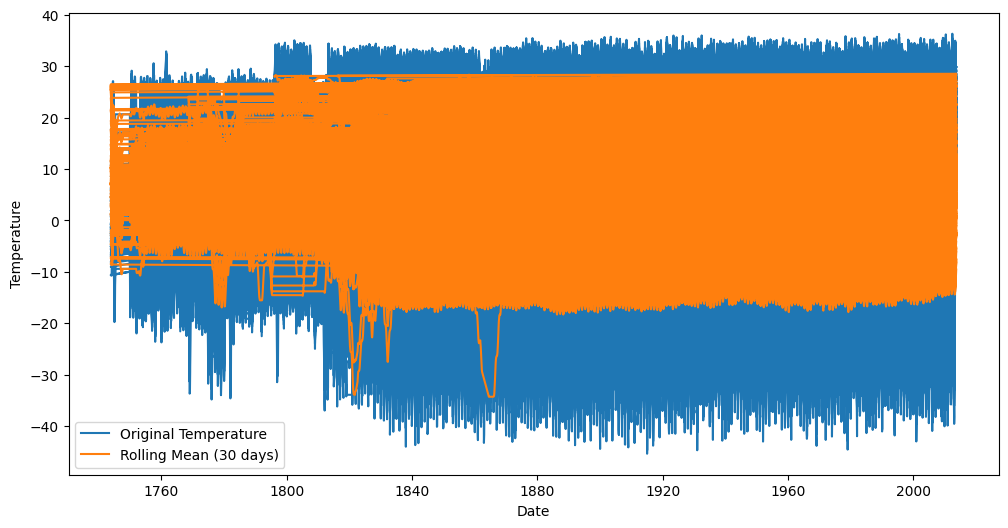

In [81]:
data['RollingMean'] = data['AverageTemperature'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AverageTemperature'], label='Original Temperature')
plt.plot(data.index, data['RollingMean'], label='Rolling Mean (30 days)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

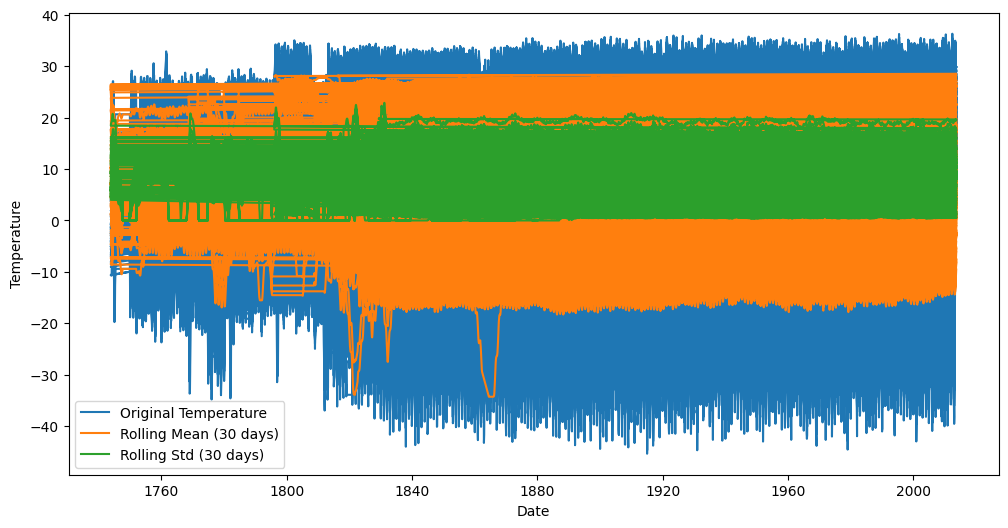

In [83]:
data['RollingMean'] = data['AverageTemperature'].rolling(window=30).mean()
data['RollingStd'] = data['AverageTemperature'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AverageTemperature'], label='Original Temperature')
plt.plot(data.index, data['RollingMean'], label='Rolling Mean (30 days)')
plt.plot(data.index, data['RollingStd'], label='Rolling Std (30 days)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

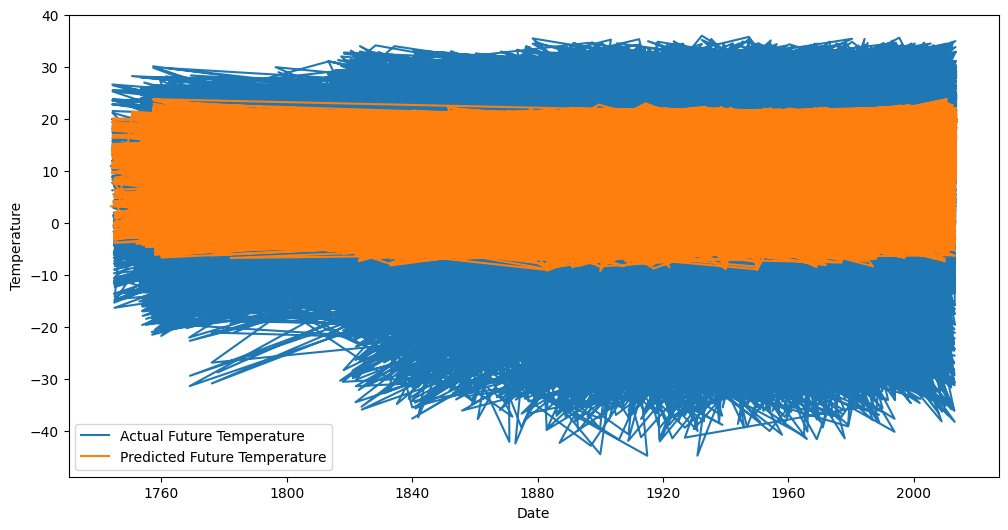

In [84]:
# Regression Predictions Plots
predicted_temperatures = reg_model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Future Temperature')
plt.plot(y_test.index, predicted_temperatures, label='Predicted Future Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [85]:
# Print regression metrics
mse = mean_squared_error(y_test, predicted_temperatures)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 131.78842178078375


In [86]:
# Print regression coefficients
print("Regression Coefficients:")
for feature, coef in zip(X.columns, reg_model.coef_):
    print(f"{feature}: {coef}")

Regression Coefficients:
RollingMean: 0.7619223770276352
RollingStd: -0.40055179113916706
